In [3]:
import matplotlib.pyplot as plt
from Bio.SeqRecord import SeqRecord

In [4]:
def plot_probes(exon_seq: str, probes: list[SeqRecord], title: str = "Probe Coverage"):
    """
    Visualize probes as horizontal bars aligned on the exon sequence.
    """
    fig, ax = plt.subplots(figsize=(12, 2))

    exon_len = len(exon_seq)
    ax.hlines(1, 0, exon_len, color="black", linewidth=2, label="Exon")

    for i, probe in enumerate(probes):
        # Извлекаем координаты из ID: ..._start_end
        parts = probe.id.split("_")
        start = int(parts[-2]) - 1
        end = int(parts[-1])
        ax.add_patch(plt.Rectangle((start, 0.8), end - start, 0.4,
                                   facecolor="skyblue", edgecolor="black"))
        ax.text((start + end) / 2, 1.25, f"P{i+1}", ha="center", fontsize=8)

    ax.set_xlim(-10, exon_len + 10)
    ax.set_ylim(0.5, 1.6)
    ax.set_xlabel("Position (nt)")
    ax.set_yticks([])
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


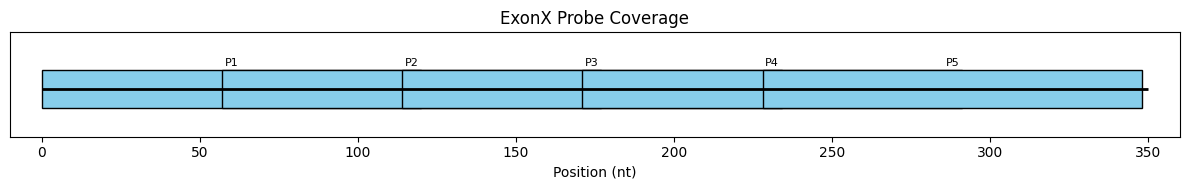

In [5]:
from probe_generator import ProbeGenerator
# from Bio.SeqRecord import SeqRecord
# from Bio.Seq import Seq

pg = ProbeGenerator(probe_length=120, max_step=60)
seq = "A" * 350
probes = pg.make_probes(seq, "exonX")

plot_probes(seq, probes, title="ExonX Probe Coverage")